In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#reading the csv file
df = pd.read_csv('premier-league.csv')
df

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
0,Middlesbrough FC,Tommy Wright,26.0,Left Winger,Leicester,€910Th.,in,Summer,0.91,Premier League,1992,1992/1993
1,Middlesbrough FC,Jonathan Gittens,28.0,defence,Southampton,€250Th.,in,Summer,0.25,Premier League,1992,1992/1993
2,Middlesbrough FC,Chris Morris,28.0,Right-Back,Celtic,?,in,Summer,NaN,Premier League,1992,1992/1993
3,Middlesbrough FC,Ben Roberts,17.0,Goalkeeper,Boro U18,-,in,Summer,NaN,Premier League,1992,1992/1993
4,Middlesbrough FC,Andy Todd,17.0,Centre-Back,Boro U18,-,in,Summer,NaN,Premier League,1992,1992/1993
...,...,...,...,...,...,...,...,...,...,...,...,...
22970,Wolverhampton Wanderers,Hayao Kawabe,26.0,Central Midfield,Grasshoppers,loan transfer,out,Winter,NaN,Premier League,2021,2021/2022
22971,Wolverhampton Wanderers,Sang-bin Jeong,19.0,Right Winger,Grasshoppers,loan transfer,out,Winter,NaN,Premier League,2021,2021/2022
22972,Wolverhampton Wanderers,Adama Traoré,26.0,Right Winger,Barcelona,loan transfer,out,Winter,NaN,Premier League,2021,2021/2022
22973,Wolverhampton Wanderers,Bruno Jordão,23.0,Central Midfield,Grasshoppers,loan transfer,out,Winter,NaN,Premier League,2021,2021/2022


In [4]:
#selecting rows only from season 2018/2019 onwards
df = df[df['season'].isin(['2018/2019','2019/2020','2020/2021','2021/2022'])]
df

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
20129,Manchester City,Riyad Mahrez,27.0,Right Winger,Leicester,€67.80m,in,Summer,67.80,Premier League,2018,2018/2019
20130,Manchester City,Philippe Sandler,21.0,Centre-Back,PEC Zwolle,€2.50m,in,Summer,2.50,Premier League,2018,2018/2019
20131,Manchester City,Daniel Arzani,19.0,Left Winger,Melbourne City,€890Th.,in,Summer,0.89,Premier League,2018,2018/2019
20132,Manchester City,Manu García,20.0,Attacking Midfield,Man City U23,-,in,Summer,NaN,Premier League,2018,2018/2019
20133,Manchester City,Arijanet Muric,19.0,Goalkeeper,Man City U23,-,in,Summer,NaN,Premier League,2018,2018/2019
...,...,...,...,...,...,...,...,...,...,...,...,...
22970,Wolverhampton Wanderers,Hayao Kawabe,26.0,Central Midfield,Grasshoppers,loan transfer,out,Winter,NaN,Premier League,2021,2021/2022
22971,Wolverhampton Wanderers,Sang-bin Jeong,19.0,Right Winger,Grasshoppers,loan transfer,out,Winter,NaN,Premier League,2021,2021/2022
22972,Wolverhampton Wanderers,Adama Traoré,26.0,Right Winger,Barcelona,loan transfer,out,Winter,NaN,Premier League,2021,2021/2022
22973,Wolverhampton Wanderers,Bruno Jordão,23.0,Central Midfield,Grasshoppers,loan transfer,out,Winter,NaN,Premier League,2021,2021/2022


In [5]:
#Finding out the number of duplicated values
df.duplicated().sum()

0

In [6]:
#Finding out the number of null values
df.isna().sum()

club_name                0
player_name              0
age                      1
position                 0
club_involved_name       0
fee                      0
transfer_movement        0
transfer_period          0
fee_cleaned           1814
league_name              0
year                     0
season                   0
dtype: int64

In [7]:
#Dropping the null values
df.dropna(inplace=True)

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_52812\614617987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [8]:
#looking at the number of rows and columns in the dataframe
df.shape

(1031, 12)

In [9]:
#Because we are only interested in buyings, we will focus on 'in' transfer movement
df_bought = df.loc[df['transfer_movement']== 'in']
df_bought.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
20129,Manchester City,Riyad Mahrez,27.0,Right Winger,Leicester,€67.80m,in,Summer,67.80,Premier League,2018,2018/2019
20130,Manchester City,Philippe Sandler,21.0,Centre-Back,PEC Zwolle,€2.50m,in,Summer,2.50,Premier League,2018,2018/2019
20131,Manchester City,Daniel Arzani,19.0,Left Winger,Melbourne City,€890Th.,in,Summer,0.89,Premier League,2018,2018/2019
20158,Manchester United,Fred,25.0,Central Midfield,Shakhtar D.,€59.00m,in,Summer,59.00,Premier League,2018,2018/2019
20159,Manchester United,Diogo Dalot,19.0,Right-Back,FC Porto,€22.00m,in,Summer,22.00,Premier League,2018,2018/2019


In [10]:
#For future reference, we also want to keep information on sellings. So we will also extract 'out' values in transfer_movement
df_sold = df.loc[df['transfer_movement']=='out']


In [11]:
#Removing unnecessary columns
columns_drop = ['club_involved_name','fee','transfer_movement','league_name','transfer_period']
df_bought.drop(columns_drop,axis = 1,inplace = True)
df_bought

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_52812\2297855161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bought.drop(columns_drop,axis = 1,inplace = True)


,club_name,player_name,age,position,fee_cleaned,year,season
20129,Manchester City,Riyad Mahrez,27.0,Right Winger,67.80,2018,2018/2019
20130,Manchester City,Philippe Sandler,21.0,Centre-Back,2.50,2018,2018/2019
20131,Manchester City,Daniel Arzani,19.0,Left Winger,0.89,2018,2018/2019
20158,Manchester United,Fred,25.0,Central Midfield,59.00,2018,2018/2019
20159,Manchester United,Diogo Dalot,19.0,Right-Back,22.00,2018,2018/2019
...,...,...,...,...,...,...,...
22947,Watford FC,Yaser Asprilla,18.0,Attacking Midfield,3.00,2021,2021/2022
22948,Watford FC,Samuel Kalu,24.0,Right Winger,3.00,2021,2021/2022
22962,Wolverhampton Wanderers,Chiquinho,21.0,Left Winger,3.50,2021,2021/2022
22963,Wolverhampton Wanderers,Sang-bin Jeong,19.0,Right Winger,1.20,2021,2021/2022


In [12]:
#Resetting the index column 
df_bought.reset_index(inplace = True)
df_bought

,index,club_name,player_name,age,position,fee_cleaned,year,season
0,20129,Manchester City,Riyad Mahrez,27.0,Right Winger,67.80,2018,2018/2019
1,20130,Manchester City,Philippe Sandler,21.0,Centre-Back,2.50,2018,2018/2019
2,20131,Manchester City,Daniel Arzani,19.0,Left Winger,0.89,2018,2018/2019
3,20158,Manchester United,Fred,25.0,Central Midfield,59.00,2018,2018/2019
4,20159,Manchester United,Diogo Dalot,19.0,Right-Back,22.00,2018,2018/2019
...,...,...,...,...,...,...,...,...
498,22947,Watford FC,Yaser Asprilla,18.0,Attacking Midfield,3.00,2021,2021/2022
499,22948,Watford FC,Samuel Kalu,24.0,Right Winger,3.00,2021,2021/2022
500,22962,Wolverhampton Wanderers,Chiquinho,21.0,Left Winger,3.50,2021,2021/2022
501,22963,Wolverhampton Wanderers,Sang-bin Jeong,19.0,Right Winger,1.20,2021,2021/2022


In [13]:
#Drop column named index
df_bought.drop('index',axis = 1, inplace = True)
df_bought

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_52812\3244686202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bought.drop('index',axis = 1, inplace = True)


,club_name,player_name,age,position,fee_cleaned,year,season
0,Manchester City,Riyad Mahrez,27.0,Right Winger,67.80,2018,2018/2019
1,Manchester City,Philippe Sandler,21.0,Centre-Back,2.50,2018,2018/2019
2,Manchester City,Daniel Arzani,19.0,Left Winger,0.89,2018,2018/2019
3,Manchester United,Fred,25.0,Central Midfield,59.00,2018,2018/2019
4,Manchester United,Diogo Dalot,19.0,Right-Back,22.00,2018,2018/2019
...,...,...,...,...,...,...,...
498,Watford FC,Yaser Asprilla,18.0,Attacking Midfield,3.00,2021,2021/2022
499,Watford FC,Samuel Kalu,24.0,Right Winger,3.00,2021,2021/2022
500,Wolverhampton Wanderers,Chiquinho,21.0,Left Winger,3.50,2021,2021/2022
501,Wolverhampton Wanderers,Sang-bin Jeong,19.0,Right Winger,1.20,2021,2021/2022


In [14]:
#Renaming the index into transfer_id
df_bought.index.name = 'transfer_id'
df_bought

,club_name,player_name,age,position,fee_cleaned,year,season
transfer_id,,,,,,,
0,Manchester City,Riyad Mahrez,27.0,Right Winger,67.80,2018,2018/2019
1,Manchester City,Philippe Sandler,21.0,Centre-Back,2.50,2018,2018/2019
2,Manchester City,Daniel Arzani,19.0,Left Winger,0.89,2018,2018/2019
3,Manchester United,Fred,25.0,Central Midfield,59.00,2018,2018/2019
4,Manchester United,Diogo Dalot,19.0,Right-Back,22.00,2018,2018/2019
...,...,...,...,...,...,...,...
498,Watford FC,Yaser Asprilla,18.0,Attacking Midfield,3.00,2021,2021/2022
499,Watford FC,Samuel Kalu,24.0,Right Winger,3.00,2021,2021/2022
500,Wolverhampton Wanderers,Chiquinho,21.0,Left Winger,3.50,2021,2021/2022


In [15]:
#Renaming the fee_cleaned column to something more identifiable
df_bought.rename(columns={'fee_cleaned':'transfer_fee(millions)'},inplace = True)
df_bought

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_52812\2286385306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bought.rename(columns={'fee_cleaned':'transfer_fee(millions)'},inplace = True)


,club_name,player_name,age,position,transfer_fee(millions),year,season
transfer_id,,,,,,,
0,Manchester City,Riyad Mahrez,27.0,Right Winger,67.80,2018,2018/2019
1,Manchester City,Philippe Sandler,21.0,Centre-Back,2.50,2018,2018/2019
2,Manchester City,Daniel Arzani,19.0,Left Winger,0.89,2018,2018/2019
3,Manchester United,Fred,25.0,Central Midfield,59.00,2018,2018/2019
4,Manchester United,Diogo Dalot,19.0,Right-Back,22.00,2018,2018/2019
...,...,...,...,...,...,...,...
498,Watford FC,Yaser Asprilla,18.0,Attacking Midfield,3.00,2021,2021/2022
499,Watford FC,Samuel Kalu,24.0,Right Winger,3.00,2021,2021/2022
500,Wolverhampton Wanderers,Chiquinho,21.0,Left Winger,3.50,2021,2021/2022


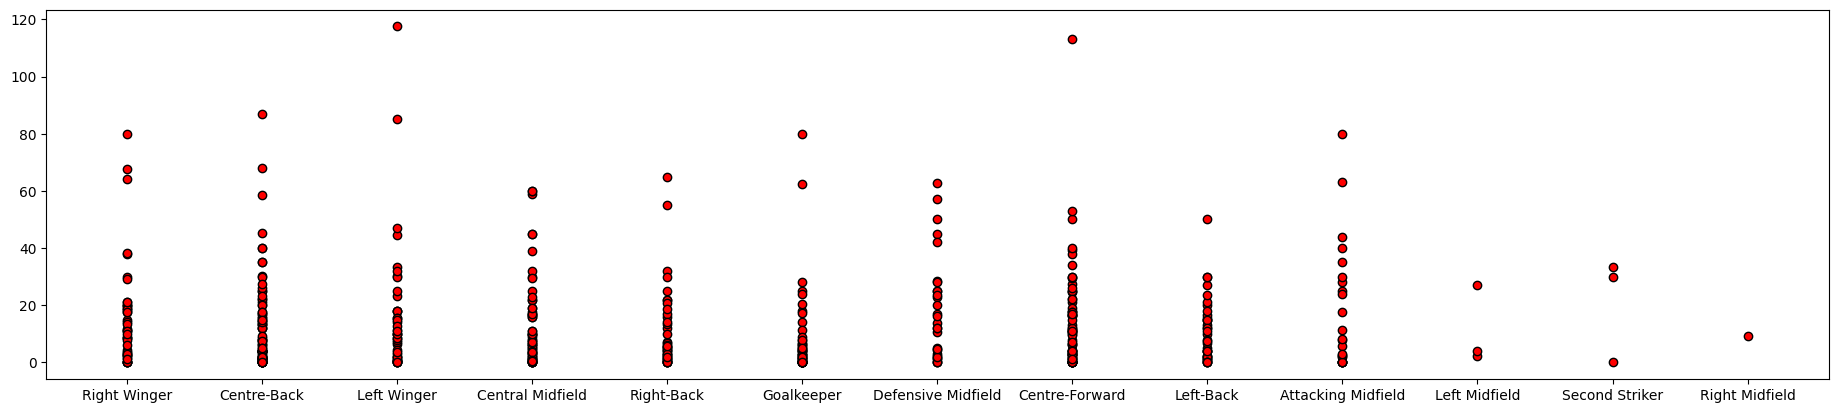

In [16]:
#plotting a scatter plot diagram to identify outliers
plt.figure().set_figwidth(23)
plt.scatter(df_bought['position'],df_bought['transfer_fee(millions)'],color = 'red',edgecolors = 'black')

In [17]:
#Removing outliers
df_bought['position'].replace({'Left Midfield':'Left Winger','Second Striker':'Centre-Forward','Right Midfield':'Right Winger'},inplace = True)


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_52812\3976943587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bought['position'].replace({'Left Midfield':'Left Winger','Second Striker':'Centre-Forward','Right Midfield':'Right Winger'},inplace = True)


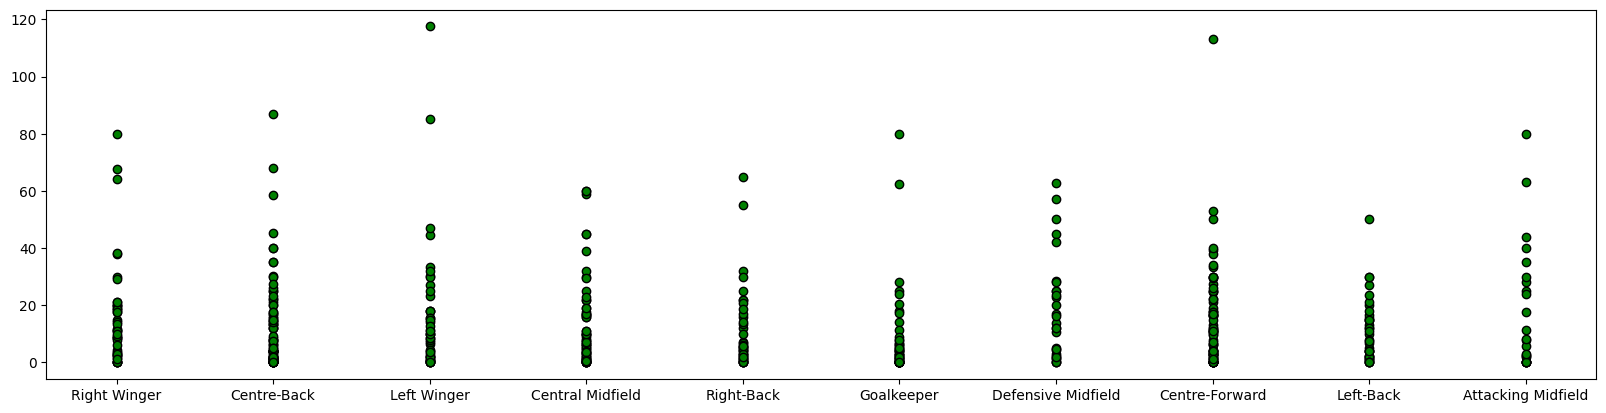

In [18]:
#Checking for outliers again
plt.figure().set_figwidth(20)
plt.scatter(df_bought['position'],df_bought['transfer_fee(millions)'],color = 'green',edgecolors = 'black')

In [19]:
#Finding out the mean of the transfer fee
mean = np.mean(df_bought['transfer_fee(millions)'])
median = np.median(df_bought['transfer_fee(millions)'])


print('mean:', mean)
print('median:', median)


mean: 13.246968190854872
median: 7.1


In [20]:
#Removing 'FC' from the club_name column
df_bought['club_name'] = df_bought['club_name'].str.replace('FC','')
df_bought.head()

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_52812\1335583191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bought['club_name'] = df_bought['club_name'].str.replace('FC','')


,club_name,player_name,age,position,transfer_fee(millions),year,season
transfer_id,,,,,,,
0,Manchester City,Riyad Mahrez,27.0,Right Winger,67.80,2018,2018/2019
1,Manchester City,Philippe Sandler,21.0,Centre-Back,2.50,2018,2018/2019
2,Manchester City,Daniel Arzani,19.0,Left Winger,0.89,2018,2018/2019
3,Manchester United,Fred,25.0,Central Midfield,59.00,2018,2018/2019
4,Manchester United,Diogo Dalot,19.0,Right-Back,22.00,2018,2018/2019
...,...,...,...,...,...,...,...
498,Watford,Yaser Asprilla,18.0,Attacking Midfield,3.00,2021,2021/2022
499,Watford,Samuel Kalu,24.0,Right Winger,3.00,2021,2021/2022
500,Wolverhampton Wanderers,Chiquinho,21.0,Left Winger,3.50,2021,2021/2022


In [21]:
#Writing out dataset to a csv file
df_bought.to_csv('transfers_cleaned.csv',index = True)

In [34]:
#Cleaning the df_sold dataset, to insert it into the database.
#Dropping unnecessary columns
columns_drop = ['club_involved_name','fee','transfer_movement','transfer_period','league_name']
df_sold.drop(columns_drop,axis=1,inplace=True)
df_sold.head()

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_52812\4200527786.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sold.drop(columns_drop,axis=1,inplace=True)


,club_name,player_name,age,position,fee_cleaned,year,season
20142,Manchester City,Angus Gunn,22.0,Goalkeeper,11.3,2018,2018/2019
20143,Manchester City,Jason Denayer,23.0,Centre-Back,10.0,2018,2018/2019
20144,Manchester City,Pablo Maffeo,20.0,Right-Back,9.0,2018,2018/2019
20145,Manchester City,Joe Hart,31.0,Goalkeeper,3.9,2018,2018/2019
20146,Manchester City,Bersant Celina,21.0,Attacking Midfield,3.4,2018,2018/2019


In [37]:
#Resetting the index
df_sold.reset_index(inplace = True)
df_sold.head()

,index,club_name,player_name,age,position,fee_cleaned,year,season
0,20142,Manchester City,Angus Gunn,22.0,Goalkeeper,11.3,2018,2018/2019
1,20143,Manchester City,Jason Denayer,23.0,Centre-Back,10.0,2018,2018/2019
2,20144,Manchester City,Pablo Maffeo,20.0,Right-Back,9.0,2018,2018/2019
3,20145,Manchester City,Joe Hart,31.0,Goalkeeper,3.9,2018,2018/2019
4,20146,Manchester City,Bersant Celina,21.0,Attacking Midfield,3.4,2018,2018/2019


In [38]:
#Drop the 'index' column 
df_sold.drop('index', axis = 1,inplace = True)
df_sold.head()

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_52812\2256153591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sold.drop('index', axis = 1,inplace = True)


,club_name,player_name,age,position,fee_cleaned,year,season
0,Manchester City,Angus Gunn,22.0,Goalkeeper,11.3,2018,2018/2019
1,Manchester City,Jason Denayer,23.0,Centre-Back,10.0,2018,2018/2019
2,Manchester City,Pablo Maffeo,20.0,Right-Back,9.0,2018,2018/2019
3,Manchester City,Joe Hart,31.0,Goalkeeper,3.9,2018,2018/2019
4,Manchester City,Bersant Celina,21.0,Attacking Midfield,3.4,2018,2018/2019


In [39]:
#Renaming the index
df_sold.index.rename('sold_id',inplace = True)
df_sold.head()

,club_name,player_name,age,position,fee_cleaned,year,season
sold_id,,,,,,,
0,Manchester City,Angus Gunn,22.0,Goalkeeper,11.3,2018,2018/2019
1,Manchester City,Jason Denayer,23.0,Centre-Back,10.0,2018,2018/2019
2,Manchester City,Pablo Maffeo,20.0,Right-Back,9.0,2018,2018/2019
3,Manchester City,Joe Hart,31.0,Goalkeeper,3.9,2018,2018/2019
4,Manchester City,Bersant Celina,21.0,Attacking Midfield,3.4,2018,2018/2019


In [46]:
#Renaming the fee_cleaned column
df_sold.rename(columns = {'fee_cleaned':'transfer_fee_out'},inplace = True)
df_sold.head()

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_52812\2072818405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sold.rename(columns = {'fee_cleaned':'transfer_fee_out'},inplace = True)


,club_name,player_name,age,position,transfer_fee_out,year,season
sold_id,,,,,,,
0,Manchester City,Angus Gunn,22.0,Goalkeeper,11.3,2018,2018/2019
1,Manchester City,Jason Denayer,23.0,Centre-Back,10.0,2018,2018/2019
2,Manchester City,Pablo Maffeo,20.0,Right-Back,9.0,2018,2018/2019
3,Manchester City,Joe Hart,31.0,Goalkeeper,3.9,2018,2018/2019
4,Manchester City,Bersant Celina,21.0,Attacking Midfield,3.4,2018,2018/2019


In [47]:
#Removing FC from the club_name column to match with the Standings table in the database
df_sold['club_name'] = df_sold['club_name'].str.replace('FC','')
df_sold.head()

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_52812\198168176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sold['club_name'] = df_sold['club_name'].str.replace('FC','')


,club_name,player_name,age,position,transfer_fee_out,year,season
sold_id,,,,,,,
0,Manchester City,Angus Gunn,22.0,Goalkeeper,11.3,2018,2018/2019
1,Manchester City,Jason Denayer,23.0,Centre-Back,10.0,2018,2018/2019
2,Manchester City,Pablo Maffeo,20.0,Right-Back,9.0,2018,2018/2019
3,Manchester City,Joe Hart,31.0,Goalkeeper,3.9,2018,2018/2019
4,Manchester City,Bersant Celina,21.0,Attacking Midfield,3.4,2018,2018/2019


In [48]:
#Exporting the dataset as a csv file
df_sold.to_csv('transfers_out.csv',index = True)